In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

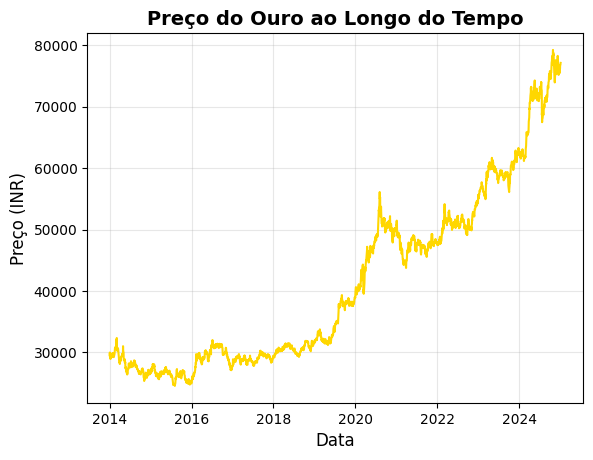

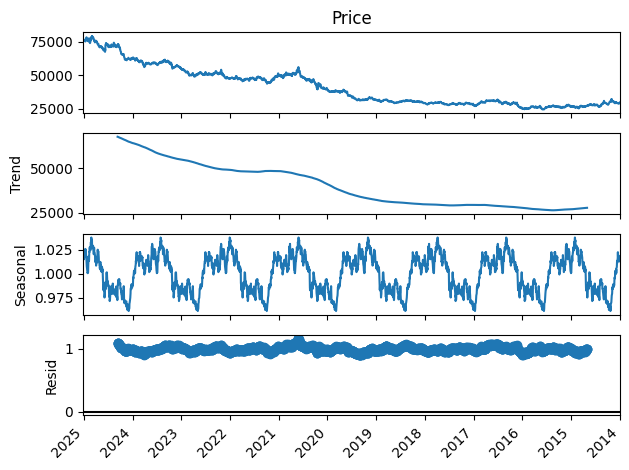

In [15]:
dataset = pd.read_csv(
    "Gold Price.csv", delimiter=",", index_col="Date", parse_dates=True
)

dataset["Price"] = dataset["Price"].astype(float)

# Gráfico: Price vs Date
# Os preços estão em INR (Rupia Indiana) para 10 gramas de ouro 24 quilates
plt.plot(dataset.index, dataset["Price"], color="gold", linewidth=1.5)
plt.title("Preço do Ouro ao Longo do Tempo", fontsize=14, fontweight="bold")
plt.xlabel("Data", fontsize=12)
plt.ylabel("Preço (INR)", fontsize=12)
plt.grid(True, alpha=0.3)

# Decomposição da Série Temporal
decompositionOfPrice = seasonal_decompose(
    dataset["Price"], model="multiplicative", period=365
)

fig = decompositionOfPrice.plot()

for ax in fig.axes:
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.xaxis.set_minor_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

# Perguntas e respostas:
# A série tem tendência? Sim, crescente.
# A série tem sazonalidade? Sim, que se repete em períodos um pouco maaiores que 1 ano.
# A série tem ciclos? Sim, ciclos econômicos de expansão e retração.


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/holtwinters/model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


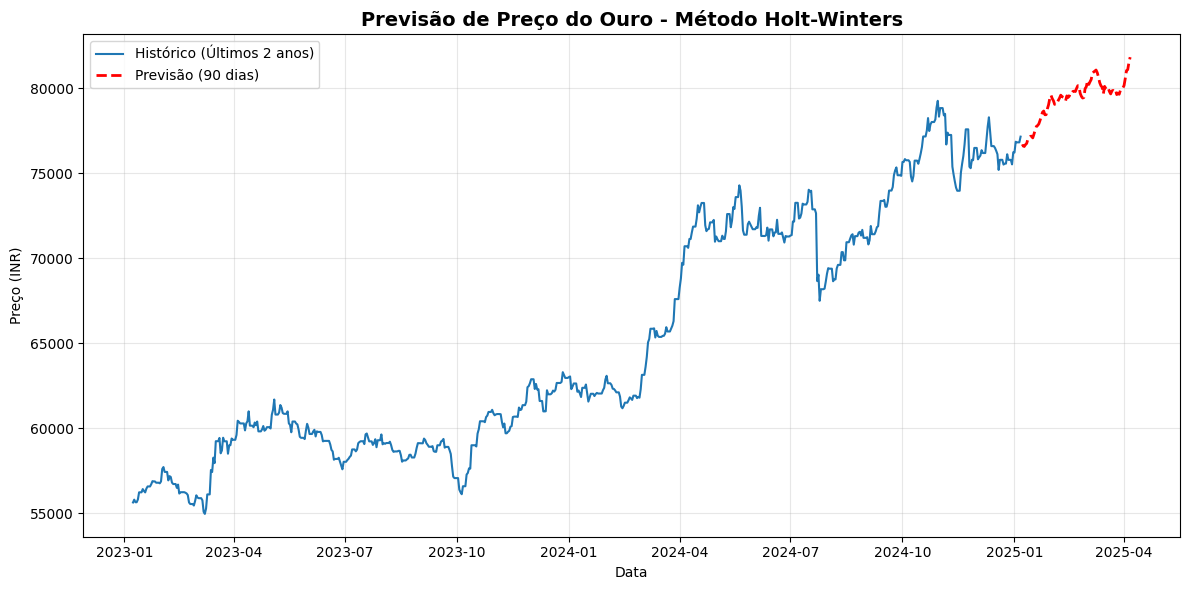

In [17]:
dataset.sort_index(inplace=True)

dataset_daily = dataset.resample('D').ffill()

model = ExponentialSmoothing(
    dataset_daily["Price"],
    trend="add",
    seasonal="mul",
    seasonal_periods=365
).fit()

dias_previsao = 90
forecast = model.forecast(dias_previsao)

plt.figure(figsize=(12, 6))

plt.plot(dataset_daily.index[-730:], dataset_daily["Price"][-730:], label="Histórico (Últimos 2 anos)")

plt.plot(forecast.index, forecast, label="Previsão (90 dias)", color="red", linestyle="--", linewidth=2)

plt.title(f"Previsão de Preço do Ouro - Método Holt-Winters", fontsize=14, fontweight="bold")
plt.xlabel("Data")
plt.ylabel("Preço (INR)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
